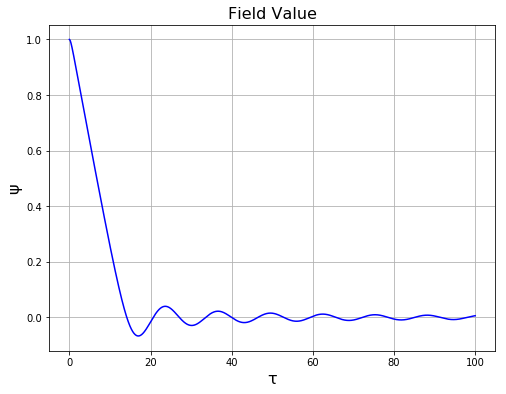

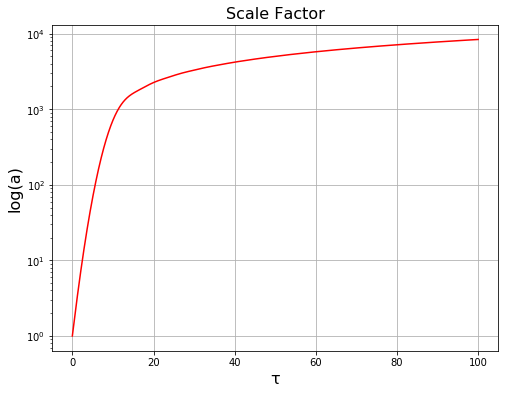

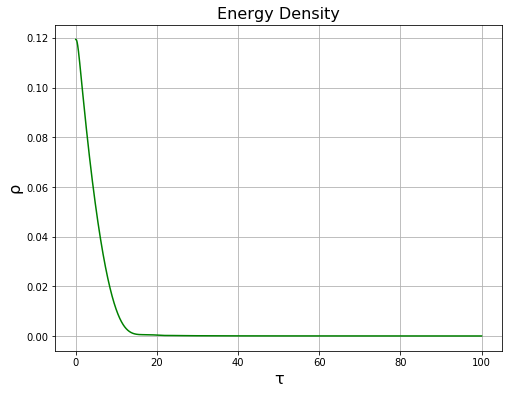

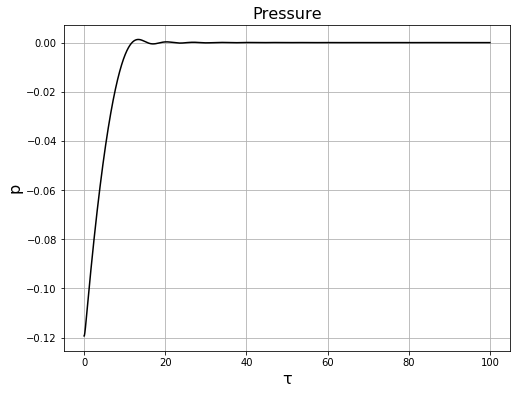

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# diffEq returns the array [dψ/dτ, ψ, a]
def diffEq(z, t): 
    return np.array([-3.0 * np.sqrt((8.0*np.pi/3.0) * (.5*z[0]**2.0 + 3.0*z[1]**2.0 
                                                                     / (8.0*np.pi*psi0**2.0))) * z[0] 
                                   - 3.0 * z[1] / (4.0 * np.pi * psi0**2.0),
                                  z[0],
                                  z[2] * np.sqrt(8.0 * np.pi / 3.0 * (.5 * z[0]**2.0 + 3.0 * z[1]**2.0 
                                                                      / (8.0 * np.pi * psi0**2.0))) ])
# Initial values
a0    = 1.0                          # Scale factor initial value
psi0  = 1.0                          # Field initial value
dpsi0 = 0.0                          # dψ/dτ initial value

# Solve diffEq
init  = np.array([dpsi0, psi0, a0])  # Put initial values in array for odeint
time  = np.arange(0, 100, .01)       # Array of time values
sol   = odeint(diffEq, init, time)   # Solve diffEq

# Calculate the energy density and pressure using values from the odeint solution
density  = .5 * sol[..., 0]**2.0 + 3.0 * sol[..., 1]**2.0 / (8.0 * np.pi * psi0**2.0)
pressure = .5 * sol[..., 0]**2.0 - 3.0 * sol[..., 1]**2.0 / (8.0 * np.pi * psi0**2.0)

plt.figure(figsize = (8, 6))
plt.plot(time, sol[..., 1], 'b')
plt.title('Field Value', fontsize = 16)
plt.xlabel('τ', fontsize = 16)
plt.ylabel('ψ', fontsize = 16)
plt.grid()
#plt.savefig('field_dimensionless')
plt.show()

plt.figure(figsize = (8, 6))
plt.plot(time, sol[..., 2], 'r')
plt.yscale('log')
plt.title('Scale Factor', fontsize = 16)
plt.xlabel('τ', fontsize = 16)
plt.ylabel('log(a)', fontsize = 16)
plt.grid()
#plt.savefig('a_dimensionless')
plt.show()

plt.figure(figsize = (8, 6))
plt.plot(time, density, 'g')
plt.title('Energy Density', fontsize = 16)
plt.xlabel('τ', fontsize = 16)
plt.ylabel('ρ', fontsize = 16)
plt.grid()
#plt.savefig('energy_density_dimensionless')
plt.show()

plt.figure(figsize = (8, 6))
plt.plot(time, pressure, color = 'black')
plt.title('Pressure', fontsize = 16)
plt.xlabel('τ', fontsize = 16)
plt.ylabel('p', fontsize = 16)
plt.grid()
#plt.savefig('pressure_dimensionless')
plt.show()
